# Exploratory Data Analysis of Pima Diabetes

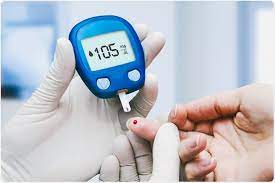

In [3]:
import pandas as pd
import pandas_profiling as pf
import plotly.express as px
import plotly as py

%matplotlib inline
py.offline.init_notebook_mode(connected=True)

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Description about the dataset

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Blood Pressure: Diastolic blood pressure (mm Hg)
* Skin Thickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Diabetes Pedigree Function: Likelihood of diabetes based on family history 
* Age: Person's age
* Outcome: Whether diabetes is present or not 

## Finding the datatypes of each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Finding the null values in the dataset

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Conclusion: There are no null values

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Obtaining the relation of various features

In [8]:
fig = px.imshow(df.corr(),text_auto=True)
fig.update_layout(
    width=1000,
    height=1000,
)

In [9]:
fig = px.scatter_matrix(data_frame=df,color=df['Outcome'])
fig.update_layout(
    width=1500,
    height=1500,
    paper_bgcolor="LightSteelBlue",
)

## Conclusions
* There is unclear relation between pregancies and any of the data for diabetic and undiabetic patients. Thus, it is difficult to say whether one can have diabetes on not based on number of times pregancies
* For glucose level, one prediction can be made that if glucose level is less than 78, chances of diabetes is less. Glucose and insulin are directly proportional
* Skin thickness and insulin as well as BMI are directly proportional. But whether there can be diabetes or not is difficult to determine
* It is also difficult to determine there can be diabetes or not based on features of diabetes pedigree and age
* Moreover, there is no multicollinearity is present 


## Determining diabetes and non-diabetes based on box quartile 
* The diabeteic and non diabeteic patient have most of the values very similar. So it is difficult to judge. 

In [10]:
px.box(data_frame=df,color=df['Outcome'])

### Let's analyze each category independently for minute analysis

For this we will use seaborn. Since, multiplot except scatterplot in plotly is unavailable

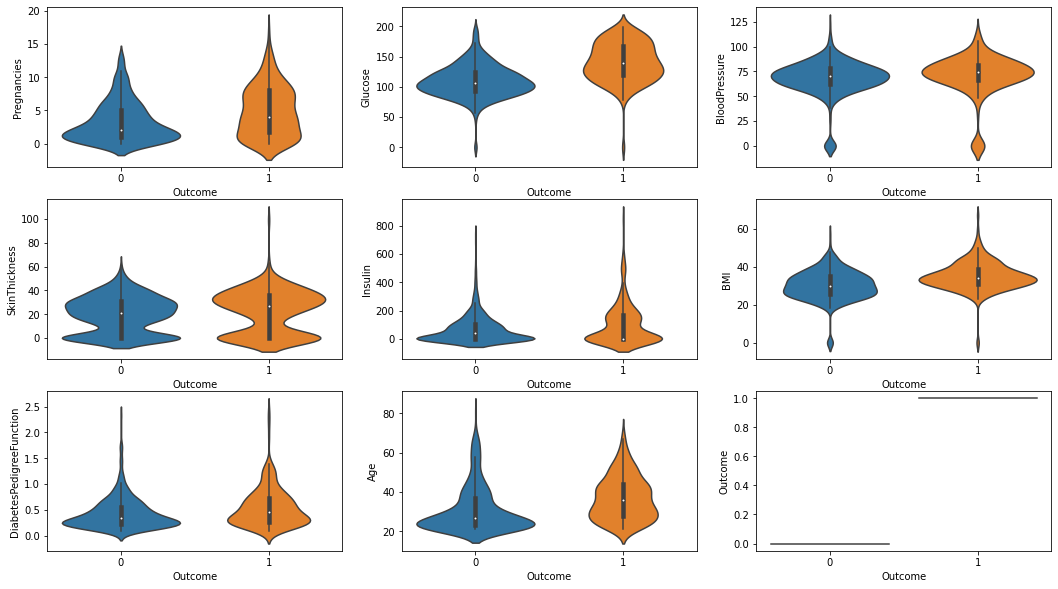

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

cnt = 0
for i in range(3):
    for j in range(3):
        sns.violinplot(ax=axes[i,j],data=df,x=df.columns[-1],y=df.columns[cnt])
        cnt+=1

* For pregenacis, if they have 5 or more times then chances of diabetes are more
* For Glucose, if glucose level is 120 or more then chances of diabetes are more
* For Blood Pressure, the diabetic patient have more bloodpressure as compared to non-diabetic patient
* For Skin thickness, the diabetic patient have either more skin thickness or less as compared to non-diabetic patient
* For Insulin, the non-diabetic patient have little higher insulin value
* For BMI, the BMI value for diabetic patient is little higher leading to type II diabetis
* For Diabetis Pedigree, Diabetics seem to have a higher pedigree function that the non-diabetics. 

## Finding group wise age with diabetes

In [186]:
age_df = df['Age'][df['Outcome']]

In [187]:
age_df.unique()

array([31, 50])

In [188]:
age_df = df[df['Outcome'].astype('bool')]

In [189]:
len(range(0,age_df.shape[0]))

268

In [190]:
age_df[['Age','Outcome']].value_counts()

Age  Outcome
25   1          14
29   1          13
41   1          13
31   1          13
43   1          11
22   1          11
38   1          10
36   1          10
33   1          10
28   1          10
32   1           9
45   1           8
27   1           8
26   1           8
24   1           8
52   1           7
42   1           7
23   1           7
46   1           7
30   1           6
37   1           6
40   1           6
51   1           5
50   1           5
21   1           5
44   1           5
35   1           5
34   1           4
53   1           4
54   1           4
47   1           4
49   1           3
39   1           3
58   1           3
59   1           2
66   1           2
62   1           2
60   1           2
56   1           2
57   1           1
61   1           1
55   1           1
48   1           1
67   1           1
70   1           1
dtype: int64

In [191]:
age_label = pd.cut(x=age_df['Age'],bins=4,labels=["Between 21 to 34","Between 34 to 45","Between 45 to 57","Between 57 to 70"])

In [192]:
age_df['age_label'] = age_label

/tmp/ipykernel_68796/838469359.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [193]:
age_analysis = age_df[['Outcome','age_label']].groupby('age_label').count()

In [194]:
import numpy as np
t = ((age_analysis*100)/age_analysis.sum()).reset_index()
type(t)

pandas.core.frame.DataFrame

In [195]:
px.pie(data_frame=t,names=t['age_label'],values=t['Outcome'])

In [196]:
t = (age_df.groupby('age_label').mean()).reset_index()
t

,age_label,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Between 21 to 34,2.729508,139.221311,65.254098,23.934426,106.401639,35.972131,0.617877,27.311475,1.0
1,Between 34 to 45,6.715909,139.568182,72.909091,19.897727,71.818182,35.693182,0.464420,39.886364,1.0
2,Between 45 to 57,7.136364,144.204545,79.181818,22.500000,121.318182,32.825000,0.561932,50.590909,1.0
3,Between 57 to 70,4.714286,160.357143,80.000000,19.928571,160.785714,31.735714,0.468500,61.857143,1.0


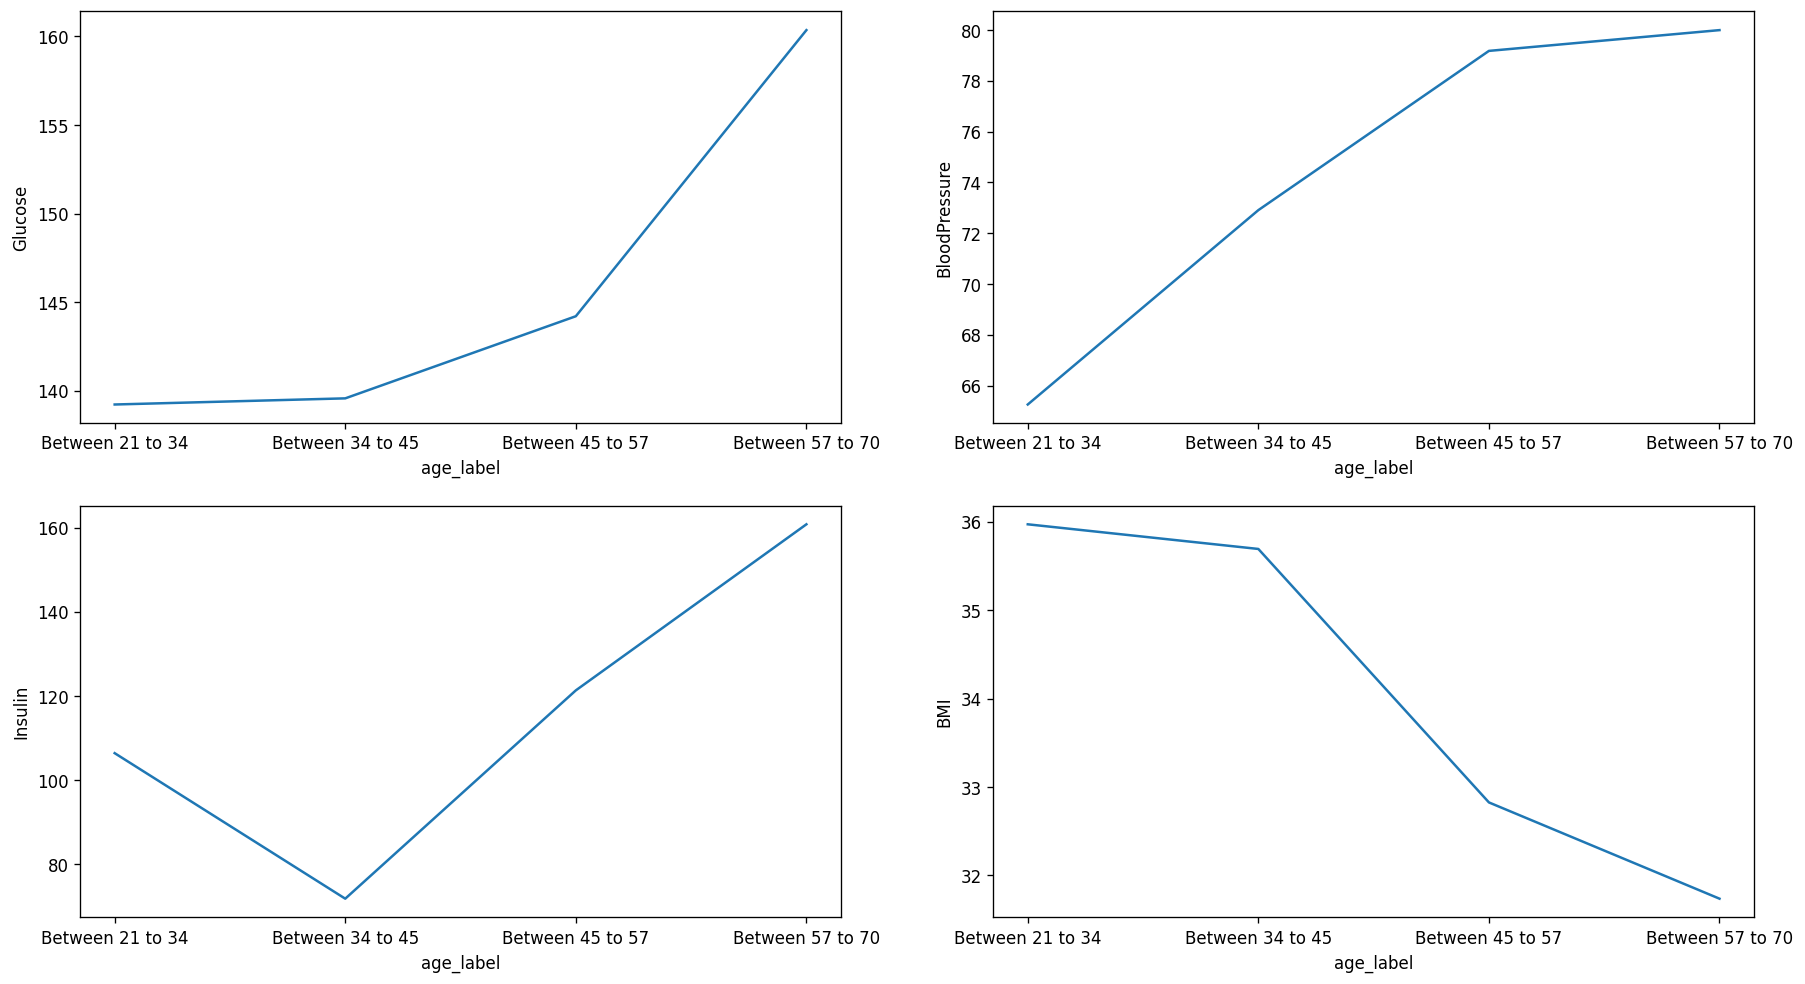

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
plt.rcParams["figure.dpi"] = 120
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.lineplot(ax=axes[0,0],x='age_label',y='Glucose',data=t)
sns.lineplot(ax=axes[0,1],x='age_label',y='BloodPressure',data=t)
sns.lineplot(ax=axes[1,0],x='age_label',y='Insulin',data=t)
sns.lineplot(ax=axes[1,1],x='age_label',y='BMI',data=t)
plt.show()

Here one can clearly observe that:
1. As the age of diabetic patient is more the glucose level is also more. Indicating diabetes increase with the age. 
2. The blood pressure of diabetic patient will be more as age increase
3. Level of insulin for age of 34-45 is lower whereas as the age increase insulin will be high 
4. As the age is more the BMI index is getting lower